In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from prepare import prepare_data
from visualize_clf import visualize_clf
from sklearn.neighbors import KNeighborsClassifier


**Loading the dataset**

In [29]:
dataset = pd.read_csv('virus_data.csv')

In [30]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataset, test_size = 0.2, train_size=0.8, random_state=126)

**Preparing the data**

In [31]:
# Prepare training set according to itself
train_df_prepared = prepare_data(train_df, train_df)
# Prepare test set according to the raw training set
test_df_prepared = prepare_data(train_df, test_df)


# # Save the preprocessed DataFrames as CSV files
train_df_prepared.to_csv('train_df_prepared.csv', index=False)
test_df_prepared.to_csv('test_df_prepared.csv', index=False)



**Part 1: Basic model selection with k-Nearest Neighbors**

**Q1**

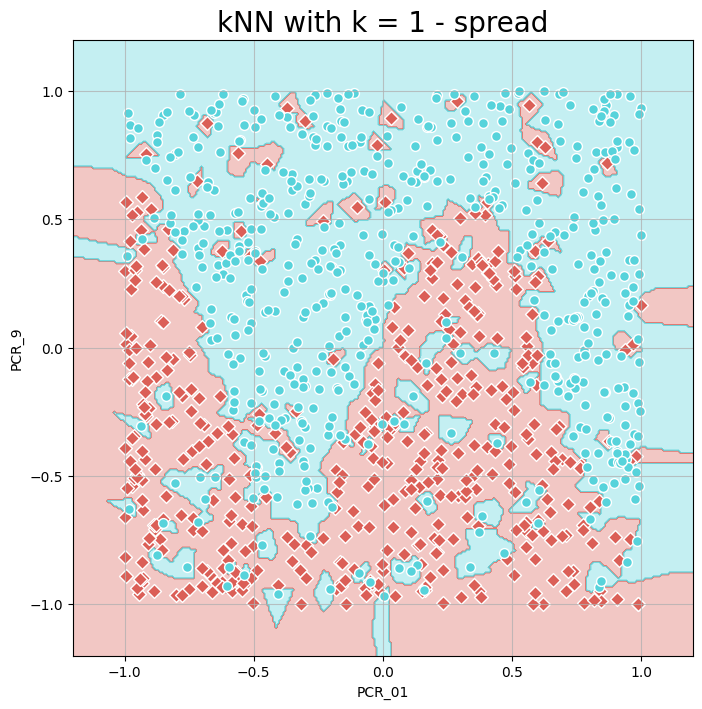

In [32]:
temp_train_df_prepared = train_df_prepared[['PCR_01', 'PCR_09']].values
temp_labels = train_df_prepared.spread.values
knn_inst_1 = KNeighborsClassifier(n_neighbors = 1)
x = temp_train_df_prepared
y = temp_labels
knn_inst_1.fit(x,y)
visualize_clf(knn_inst_1, x, y, "kNN with k = 1 - spread", "PCR_01", "PCR_9" )

**Q2**

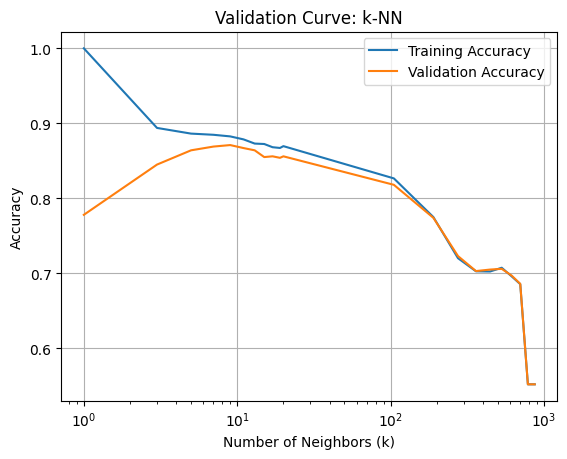

Best k value: 9
Mean training accuracy: 0.8825714285714286
Mean validation accuracy: 0.871


In [33]:
from sklearn.model_selection import cross_validate

# Define the k values to try
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Lists to store mean training and validation accuracies for each k value
train_accuracies = []
val_accuracies = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, x, y, cv=8, scoring='accuracy', return_train_score=True)
    train_acc = np.mean(scores['train_score'])
    val_acc = np.mean(scores['test_score'])
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot the validation curve
plt.figure()
plt.semilogx(k_values, train_accuracies, label='Training Accuracy')
plt.semilogx(k_values, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: k-NN')
plt.legend()
plt.grid(True)
##plt.savefig('validation_curve.png')
plt.show()

best_k = k_values[np.argmax(val_accuracies)]
best_train_accuracy = train_accuracies[np.argmax(val_accuracies)]
best_val_accuracy = np.max(val_accuracies)

print("Best k value:", best_k)
print("Mean training accuracy:", best_train_accuracy)
print("Mean validation accuracy:", best_val_accuracy)

**Q3+4**

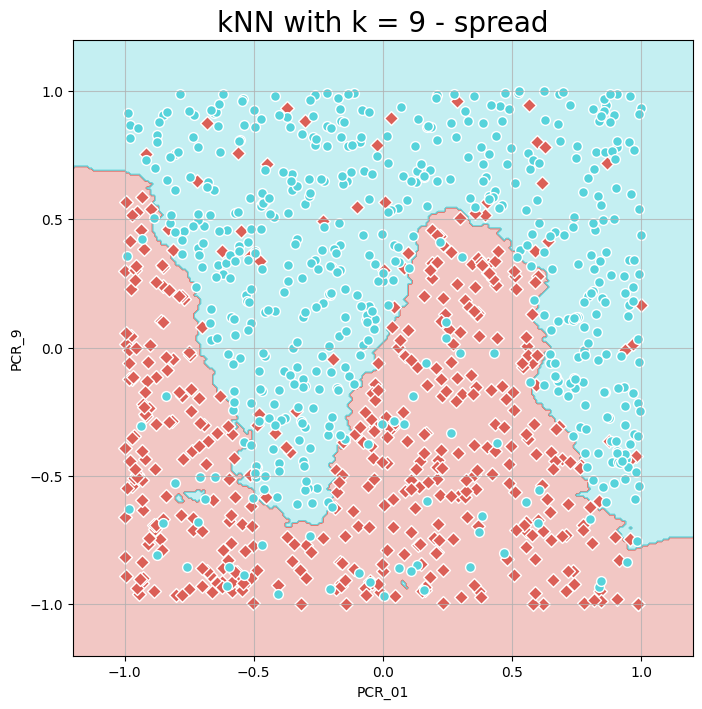

In [34]:
knn_inst_9 = KNeighborsClassifier(n_neighbors = 9)
x = temp_train_df_prepared
y = temp_labels
knn_inst_9.fit(x,y)
visualize_clf(knn_inst_9, x, y, "kNN with k = 9 - spread", "PCR_01", "PCR_9" )

**Q5**

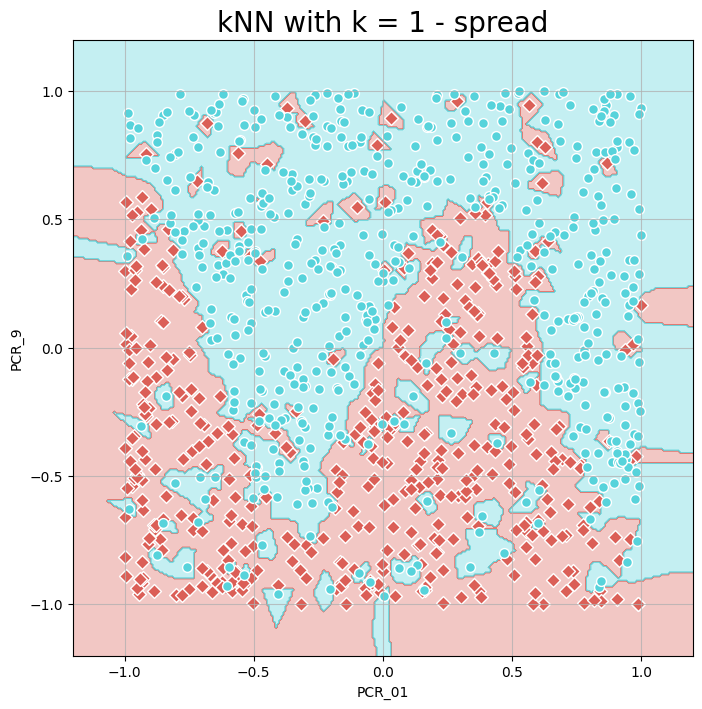

In [35]:
knn_inst_1 = KNeighborsClassifier(n_neighbors = 1)
x = temp_train_df_prepared
y = temp_labels
knn_inst_1.fit(x,y)
visualize_clf(knn_inst_1, x, y, "kNN with k = 1 - spread", "PCR_01", "PCR_9" )

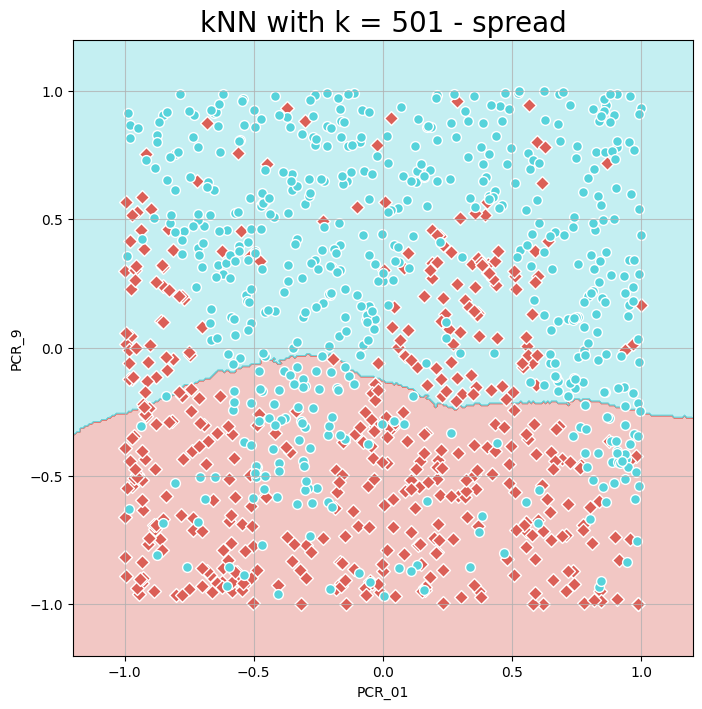

In [36]:
knn_inst_501 = KNeighborsClassifier(n_neighbors = 501)
x = temp_train_df_prepared
y = temp_labels
knn_inst_501.fit(x,y)
visualize_clf(knn_inst_501, x, y, "kNN with k = 501 - spread", "PCR_01", "PCR_9" )

**Q6**

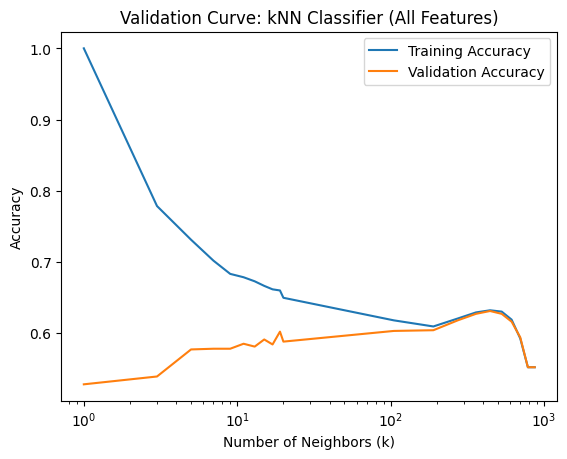

Best k value: 445
Mean Training Accuracy: 0.632
Mean Validation Accuracy: 0.631


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Extract the features and labels
temp_train_df_prepared = train_df_prepared.drop('spread', axis=1)
categorical_columns = ['sex', 'household_income', 'PCR_01', 'PCR_02', 'PCR_03',
                        'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 
                        'PCR_10', 'risk', 'cough', 'low_appetite', 'shortness_of_breath',
                          'sore_throat', 'fever', 'A', 'B', 'O', 'curr_location_x', 'curr_location_y']  # Categorical column names
temp_train_df_encoded = pd.get_dummies(temp_train_df_prepared, columns=categorical_columns)
temp_train_df_encoded = temp_train_df_encoded.values
temp_labels = train_df_prepared.spread.values

# Define the range of k values
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Perform cross-validation and collect the training and validation scores
train_scores = []
val_scores = []

for k in k_values:
    knn_inst = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn_inst, temp_train_df_encoded, temp_labels, cv=8, scoring='accuracy', return_train_score=True)
    train_scores.append(np.mean(cv_results['train_score']))
    val_scores.append(np.mean(cv_results['test_score']))

# Plot the validation curve
plt.figure()
plt.semilogx(k_values, train_scores, label='Training Accuracy')
plt.semilogx(k_values, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Validation Curve: kNN Classifier (All Features)")
plt.show()

# Determine the best k value
best_k_index = np.argmax(val_scores)
best_k = k_values[best_k_index]
best_train_accuracy = train_scores[best_k_index]
best_val_accuracy = val_scores[best_k_index]

# Print the results
print("Best k value:", best_k)
print("Mean Training Accuracy:", best_train_accuracy)
print("Mean Validation Accuracy:", best_val_accuracy)
